## Project 5 : Classification

## Instructions

### Description

Practice classification on the Titanic dataset.

### Grading

For grading purposes, we will clear all outputs from all your cells and then run them all from the top.  Please test your notebook in the same fashion before turning it in.

### Submitting Your Solution

To submit your notebook, first clear all the cells (this won't matter too much this time, but for larger data sets in the future, it will make the file smaller).  Then use the File->Download As->Notebook to obtain the notebook file.  Finally, submit the notebook file on Canvas.


In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Introduction

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

Intro Videos: 
https://www.youtube.com/watch?v=3lyiZMeTKIo
and
https://www.youtube.com/watch?v=ItjXTieWKyI 

The `titanic_data.csv` file contains data for `887` of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (`0=No`), their age, their passenger-class (`1=1st Class, Upper`), gender, and the fare they paid (£s*). For more on the currency: http://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html

We are going to try to see if there are correlations between the feature data provided (find a best subset of features) and passenger survival.

### Problem 1: Load and understand the data (35 points)

#### Your task (some of this is the work you completed for L14 - be sure to copy that work into here as needed)
Conduct some preprocessing steps to explore the following and provide code/answers in the below cells:
1. Load the `titanic_data.csv` file into a pandas dataframe
2. Explore the data provided (e.g., looking at statistics using describe(), value_counts(), histograms, scatter plots of various features, etc.) 
3. What are the names of feature columns that appear to be usable for learning?
4. What is the name of the column that appears to represent our target?
5. Formulate a hypothesis about the relationship between given feature data and the target
6. How did Pclass affect passenngers' chances of survival?
7. What is the age distribution of survivors?

In [2]:
# Step 1. Load the `titanic_data.csv` file into a pandas dataframe
boat = pd.read_csv("titanic_data.csv")

In [3]:
# Step 2. Explore the data provided (e.g., looking at statistics using describe(), value_counts(), histograms, scatter plots of various features, etc.) 
print("Headers: " + str(list(boat)))
print("\nTotal Number of Survivors: " + str(boat["Survived"].value_counts()[1]))
print("Survival Rate: " + str(342 / 757))

children = boat[boat["Age"] < 18]

print("\nNumber of Children: " + str(len(children["Age"])))
print("Surviving Children: " + str(children["Survived"].value_counts()[1]))
print("Survival Rate: " + str(65 / 130 * 100) + "%")

print("\nNumber of adults: " + str(887 - len(children["Age"])))
print("Surviving Adults: " + str(boat["Survived"].value_counts()[1] - children["Survived"].value_counts()[1]))
print("Survival Rate: " + str(277 / 757 * 100) + "%")

boat.describe()

print('\nSurvived Col:')
for i in range(10):
    print(boat['Survived'][i])

Headers: ['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']

Total Number of Survivors: 342
Survival Rate: 0.45178335535006603

Number of Children: 130
Surviving Children: 65
Survival Rate: 50.0%

Number of adults: 757
Surviving Adults: 277
Survival Rate: 36.591809775429326%

Survived Col:
0
1
1
1
0
0
0
0
1
1


---

**Edit this cell to provide answers to the following steps:**

---

Step 3. What are the names of feature columns that appear to be usable for learning?

Age, Pclass, Survived, Sex, Age, Parents/Children Aboard

Step 4. What is the name of the column that appears to represent our target?

Survived (Binary true false classifications)

Step 5. Formulate a hypothesis about the relationship between given feature data and the target

General survival rate will be higher in children

In [4]:
#Step 6. How did Pclass affect passenngers' chances of survival?
#Show your work with a bar plot, dataframe selection, or visual of your choice.
classSums = [0,0,0,0]
for x in range(len(boat)):
    classSums[boat['Pclass'][x]] += 1
    
for x in range(1,len(classSums)):
    print(f"Class {x} had a survival rate of: {classSums[x] / 887}")

Class 1 had a survival rate of: 0.24351747463359638
Class 2 had a survival rate of: 0.20744081172491544
Class 3 had a survival rate of: 0.5490417136414881


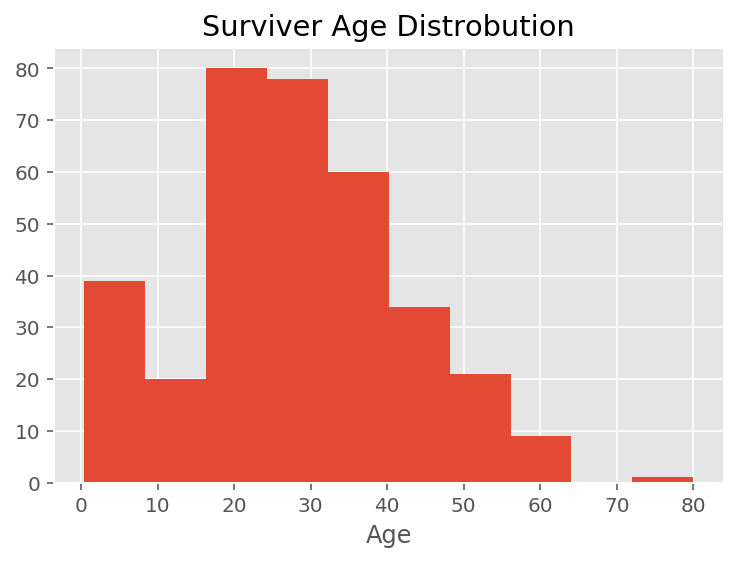

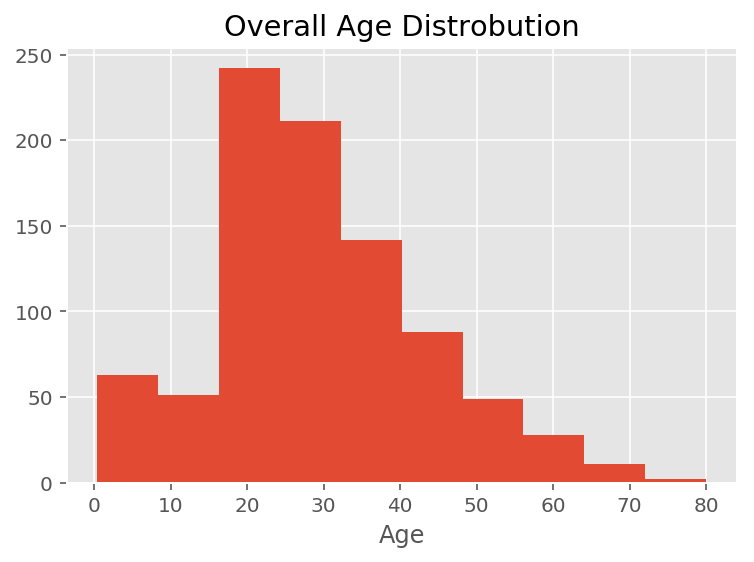

In [5]:
#Step 7. What is the age distribution of survivors?
#Show your work with a dataframe operation and/or histogram plot.
ages = []
for x in range(len(boat)):
    if boat['Survived'][x]:
        ages.extend([boat['Age'][x]])
plt.title('Surviver Age Distrobution')
plt.xlabel("Age")
plt.hist(ages)
plt.show()

plt.title('Overall Age Distrobution')
plt.xlabel("Age")
plt.hist(boat['Age'])
plt.show()

### Problem 2: transform the data (10 points)
The `Sex` column is categorical, meaning its data are separable into groups, but not numerical. To be able to work with this data, we need numbers, so you task is to transform the `Sex` column into numerical data with pandas' `get_dummies` feature and remove the original categorical `Sex` column.

In [6]:
boat['Sex']= pd.get_dummies(boat['Sex'])

### Problem 3: Classification (30 points)
Now that the data is transformed, we want to run various classification experiments on it. The first is `K Nearest Neighbors`, which you will conduct by:

1. Define input and target data by creating lists of dataframe columns (e.g., inputs = ['Pclass', etc.)
2. Split the data into training and testing sets with `train_test_split()`
3. Create a `KNeighborsClassifier` using `5` neighbors at first (you can experiment with this parameter)
4. Train your model by passing the training dataset to `fit()`
5. Calculate predicted target values(y_hat) by passing the testing dataset to `predict()`
6. Print the accuracy of the model with `score()`

** Note: If you get a python warning as you use the Y, trainY, or testY vector in some of the function calls about "DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, )", you can look up how to use trainY.values.ravel() or trainY.values.flatten() or another function, etc.

In [7]:
#inputs = Pclass, Age, Sex, Fare
#inputs = pd.concat([boat["Pclass"], boat["Age"],boat["Pclass"], boat["Fare"]],  axis=1)
#target = Surviaval
#target = boat["Survived"]
#inputs.describe()

In [8]:
from sklearn.model_selection import train_test_split
train , test =train_test_split(boat)
train.describe()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,0.377444,2.329323,0.333835,29.120677,0.506767,0.383459,31.820313
std,0.485112,0.824035,0.471936,14.038290,1.099164,0.837036,51.797245
min,0.000000,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,13.791700
75%,1.000000,3.000000,1.000000,37.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
from sklearn.neighbors import KNeighborsClassifier
k = 5

model = KNeighborsClassifier(k)
model.fit(train[["Pclass", "Age", "Pclass", "Fare"]], train["Survived"])

yhat = model.predict(train[["Pclass", "Age", "Pclass", "Fare"]])
model.score(test[["Pclass", "Age", "Pclass", "Fare"]], test['Survived'])

0.6801801801801802

### Problem 4: Cross validation, classification report (15 points)
- Using the concepts from the 17-model_selection slides and the [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function from scikit-learn, estimate the f-score ([`f1-score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score) (you can use however many folds you wish). To get `cross_val_score` to use `f1-score` rather than the default accuracy measure, you will need to set the `scoring` parameter and use a scorer object created via [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html#sklearn.metrics.make_scorer).  Since this has a few parts to it, let me just give you that parameter: ```scorerVar = make_scorer(f1_score, pos_label=1)```

- Using the concepts from the end of the 14-classification slides, output a confusion matrix.

- Also, output a classification report [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) from sklearn.metrics showing more of the metrics: precision, recall, f1-score for both of our classes.

In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection

scorerVar = make_scorer(f1_score, pos_label=1)

scores = cross_val_score(model, boat[["Pclass", "Age", "Pclass", "Fare"]], boat["Survived"],cv = 5, scoring = scorerVar)
print(scores.mean())

print(confusion_matrix(test['Survived'], model.predict(test[["Pclass", "Age", "Pclass", "Fare"]])))

print(classification_report(test['Survived'], model.predict(test[["Pclass", "Age", "Pclass", "Fare"]])))

NameError: name 'cross_val_score' is not defined

### Problem 5: Logistic Regression (15 points)

Now, repeat the above experiment using the [`LogisticRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) model in scikit-learn, and output:

- The fit accuracy (using the `score` method of the model)
- The f-score (using the [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function)
- The confusion matrix
- The precision, recall, and f-measure for the 1 class (you can just print the results of the [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function from sklearn.metrics)

In [ ]:
from sklearn.linear_model import LogisticRegression
#create a model object
model = LogisticRegression()


#train our model
model.fit(train[["Pclass", "Age", "Pclass", "Fare"]], train["Survived"])

#evaluate the model 
yhat = model.predict(train[["Pclass", "Age", "Pclass", "Fare"]])
score = model.score(test[["Pclass", "Age", "Pclass", "Fare"]], test['Survived'])
print(f"model score: {score}")

#setup to get f-score and cv
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, boat[["Pclass", "Age", "Pclass", "Fare"]], boat["Survived"],cv = 5, scoring = scorerVar)
print(f"Cross Validation f1_score: {scores.mean()}")

#confusion matrix
print("Confusion Matrix")
print(confusion_matrix(test['Survived'], model.predict(test[["Pclass", "Age", "Pclass", "Fare"]])))

#classification report
print("\nClassification Report")
print(classification_report(test['Survived'], model.predict(test[["Pclass", "Age", "Pclass", "Fare"]])))

### Problem 6: Support Vector Machines (15 points)
Now, repeat the above experiment using the using a Support Vector classifier [`SVC`](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) with default parameters (RBF kernel) model in scikit-learn, and output:

- The fit accuracy (using the `score` method of the model)
- The f-score (using the [`cross_val_score`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function)
- The confusion matrix
- The precision, recall, and f-measure for the 1 class (you can just print the results of the [`classification_report`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) function from sklearn.metrics)

In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

#create a model object
model = SVC()

#train our model
model.fit(train[["Pclass", "Age", "Pclass", "Fare"]], train["Survived"])

#evaluate the model 
yhat = model.predict(train[["Pclass", "Age", "Pclass", "Fare"]])
score = model.score(test[["Pclass", "Age", "Pclass", "Fare"]], test['Survived'])
print(f"model score: {score}")

#setup to get f-score and cv
scorerVar = make_scorer(f1_score, pos_label=1)
scores = cross_val_score(model, boat[["Pclass", "Age", "Pclass", "Fare"]], boat["Survived"],cv = 5, scoring = scorerVar)
print(f"Cross Validation f1_score: {scores.mean()}")

#confusion matrix
print("Confusion Matrix")
print(confusion_matrix(test['Survived'], model.predict(test[["Pclass", "Age", "Pclass", "Fare"]])))

#classification report
print("\nClassification Report")
print(classification_report(test['Survived'], model.predict(test[["Pclass", "Age", "Pclass", "Fare"]])))

/home/warfield/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/warfield/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/warfield/.local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/warfield/.local/lib/python3.7/site-packages/sklearn/

model score: 0.6126126126126126
Cross Validation f1_score: 0.42138647276780505
Confusion Matrix
[[108  23]
 [ 63  28]]

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.82      0.72       131
           1       0.55      0.31      0.39        91

   micro avg       0.61      0.61      0.61       222
   macro avg       0.59      0.57      0.55       222
weighted avg       0.60      0.61      0.58       222



### Problem 7: Comparision and Discussion (5 points)
Edit this cell to provide a brief discussion (3-5 sentances at most):
1. What was the model/algorithm that performed best for you?

Logistic Regression performed the best

2. What feaures and parameters were used to achieve that performance?

Tweaking SVM to use a linear kernal also worked just as well as Logistical Regression

3. What insights did you gain from your experimentation about the predictive power of this dataset and did it match your original hypothesis about the relationship between given feature data and the target?

Age really did not effect survival rates. I was really surpised by this!

### Questionnaire
1) How long did you spend on this assignment?
<br>~2hrs<br>
2) What did you like about it? What did you not like about it?
<br>The breadth of classification measures<br>
3) Did you find any errors or is there anything you would like changed?
<br>Nope<br>